# Homework 2 - eCommerce analytics

### [RQ1] A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 
#### 1) view, 2) cart, 3) purchase. 
#### Which is the rate of complete funnels? 

#### (a) What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view / removefromchart etc).

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import time

In [102]:
def read_both_datasets():
    oct19_dataset = pd.read_csv('dataset/2019-Oct.csv')
    nov19_dataset = pd.read_csv('dataset/2019-Nov.csv')
    frames = [oct19_dataset, nov19_dataset]
    dataset = pd.concat(frames)
    dataset = dataset.reset_index()
    return dataset

def read_sample_dataset():
    dataset = pd.read_csv("dataset/sample_dataset.csv")
    dataset = dataset.reset_index()
    return dataset

In [103]:
dataset = read_both_datasets()
dataset.head(5)

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [104]:
dataset_sample = read_sample_dataset()
dataset_sample.head(5)

,index,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,53806287,2019-11-22 16:13:25 UTC,view,4100228,2053013561218695907,NaN,sony,527.17,554090053,50d91114-8863-4e7a-b462-9af23521dc70
1,1,23627201,2019-10-18 06:10:28 UTC,view,1005164,2053013555631882655,electronics.smartphone,xiaomi,291.76,513880930,35dbcb07-763b-46d0-9868-29b3e80effda
2,2,15736269,2019-10-12 19:51:19 UTC,view,1004990,2053013555631882655,electronics.smartphone,oppo,231.64,514843095,ed00cd88-1dd8-42d6-ac35-fe24d77b9d15
3,3,2652978,2019-10-03 06:18:22 UTC,view,1004139,2053013555631882655,electronics.smartphone,xiaomi,102.16,549735763,cb719144-2a83-4fa4-9500-a41e3f937739
4,4,18515868,2019-11-11 14:23:01 UTC,view,12720462,2053013553559896355,NaN,goform,54.06,570169301,3e6bca57-53e4-419f-83b9-16c4fe656276


<BarContainer object of 4 artists>

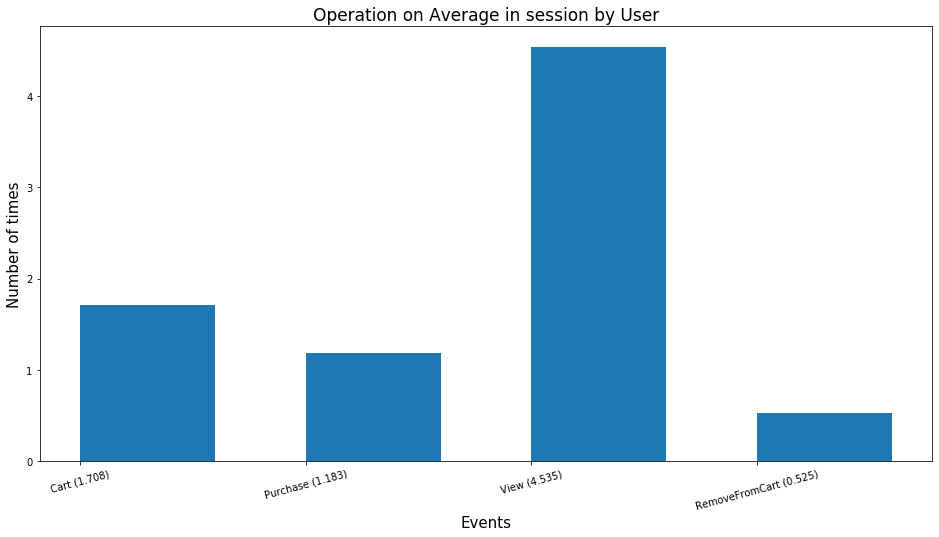

In [105]:
#Getting event-type on every user_session
OnAverage_operation = dataset.pivot_table(index=['user_session','event_type'], aggfunc='size')

#Getting Average of events users perform 
plt.figure(figsize=(16,8))
daataf = np.round(OnAverage_operation.groupby(['event_type']).mean(),3)
daataf['removefromCart'] = np.round(daataf['cart']-daataf['purchase'],3)
plt.title("Operation on Average in session by User",fontsize=17)
plt.xlabel("Events",fontsize=15)
plt.ylabel("Number of times",fontsize=15)
plt.xticks(rotation=15)
plt.bar(['Cart ({})'.format(daataf['cart']),'Purchase ({})'.format(daataf['purchase']),'View ({})'
         .format(daataf['view']),'RemoveFromCart ({})'.format(daataf['removefromCart'])],daataf,
        width = 0.6,align='edge',bottom=0)


#### (b) How many times, on average, a user views a product before adding it to the cart?

In [106]:
#Pivot Table according to Index "User ID" and "Product ID" and Columns are values of "Event Type" View, Cart and Purchase
OnAverage_viewProduct = dataset.pivot_table(index=['user_id','product_id'],columns=['event_type'], aggfunc='size')
Index_label = OnAverage_viewProduct[OnAverage_viewProduct['cart']>0]
Index_label = Index_label.drop(['purchase'],axis=1)
Index_label.head(15)

event_type            cart  view
user_id   product_id            
74383042  30901102     1.0   2.0
94566147  1005007      1.0   7.0
107837897 4700199      1.0   8.0
          4700419      2.0   7.0
          4700557      1.0   5.0
121339215 13400001     1.0   2.0
124298297 49100002     2.0   1.0
125917727 30100067     4.0  11.0
126150271 26900069     1.0   2.0
128968633 1004888      1.0   3.0
          21401209     1.0   2.0
143562268 13400771     1.0   7.0
149269892 3701081      1.0   3.0
154128341 11700129     1.0   3.0
157929318 28100010     1.0   2.0

<BarContainer object of 1 artists>

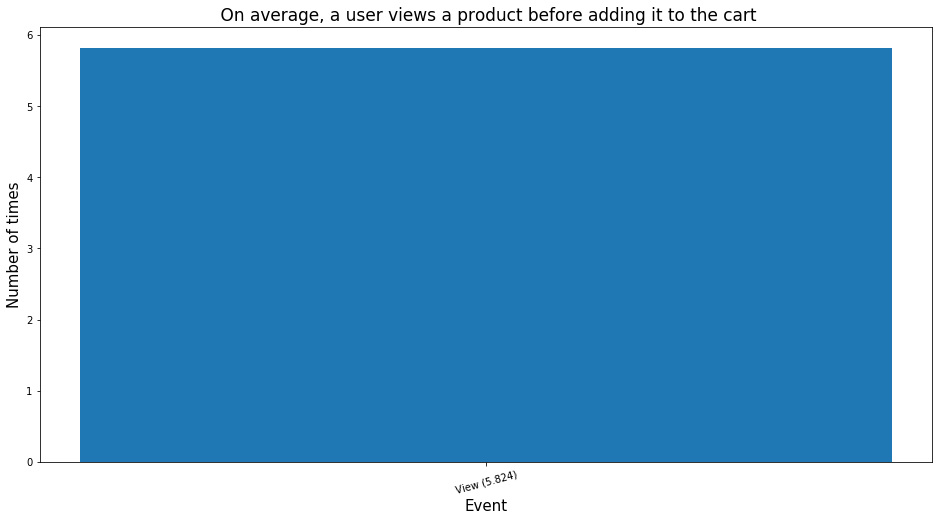

In [107]:
#Getting mean of the View and Plotting it
mean = np.round(Index_label['view'].mean(),3)

plt.figure(figsize=(16,8))
plt.title(" On average, a user views a product before adding it to the cart",fontsize=17)
plt.xlabel("Event",fontsize=15)
plt.ylabel("Number of times",fontsize=15)
plt.xticks(rotation=15)
plt.bar(['View ({})'.format(mean)],mean,width = 0.8)

#### (c) What’s the probability that products added once to the cart are effectively bought?

In [108]:
#Finding Probability of Product bought after adding to CART
Index_label_C = OnAverage_viewProduct[OnAverage_viewProduct['purchase']>1]
Index_label_C = Index_label_C.drop(['view'],axis=1)
Index_label_C = Index_label_C.fillna(0)
Index_label_C['probability'] = Index_label_C['purchase'] / (Index_label_C['cart'] + Index_label_C['purchase'])

#Probability Product Wise
Index_label_C.head(10)

,event_type,cart,purchase,probability
user_id,product_id,,,
340041246,9300037,1.0,3.0,0.750000
391549292,16700121,2.0,2.0,0.500000
403810661,1005160,4.0,2.0,0.333333
415873351,1004858,5.0,2.0,0.285714
428718574,2700452,5.0,2.0,0.285714
431726725,12710984,9.0,5.0,0.357143
434715713,5100816,8.0,2.0,0.200000
435854274,2800395,2.0,2.0,0.500000
445228646,1500258,3.0,2.0,0.400000


In [109]:
Index_label_Probability_avg = np.round(Index_label_C['probability'].mean(),5)*100
print("Probability of product added to cart are effectively on Average is {} %".format(Index_label_Probability_avg))

Probability of product added to cart are effectively on Average is 57.458 %


#### (d) What’s the average time an item stays in the cart before being removed?

##  <font color='red'>As "RemoveFromCart" value is absent in Event_type, It is not possible to solve"</font> 

#### (e) How much time passes on average between the first view time and a purchase/addition to cart?

In [110]:
dataset = dataset.sort_index(by=["user_id"])
Sample = dataset[["user_id","product_id","event_time","event_type"]]
Sample = Sample.sort_index(by=["user_id","event_time","product_id"])

get_data = Sample.groupby(by=["user_id","product_id"]).sum()
get_data = get_data[get_data['event_type'].str.contains('cart')]

jj = get_data['event_time'].str.slice(0, 19)
jl = get_data['event_time'].str.slice(23, 42)

jj = pd.DataFrame(jj)
jl = pd.DataFrame(jl)

get_data['View Time'] = jj['event_time']
get_data['Purchase / Cart Time'] = jl['event_time']
up_data = get_data
up_data = up_data[~up_data['event_type'].isin(['cart'])]

# Data with View Time and Cart Time Separated
pd.DataFrame(up_data[["View Time","Purchase / Cart Time"]]).head(10)

C:\Users\Zain\AppData\Local\Continuum\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.
C:\Users\Zain\AppData\Local\Continuum\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,,View Time,Purchase / Cart Time
user_id,product_id,,
512441248,4804055,2019-11-05 16:47:02,2019-11-05 16:48:30
513633813,1005116,2019-10-19 18:50:43,2019-11-08 18:48:38
514245956,1004856,2019-11-15 10:17:43,2019-11-22 22:54:47
514912430,1004873,2019-10-04 10:52:12,2019-10-14 06:52:09
516696564,15201231,2019-11-27 08:57:24,2019-11-27 09:05:56
517466635,3700621,2019-11-07 13:56:50,2019-11-15 01:34:39
517684240,3601485,2019-10-17 10:23:32,2019-11-05 05:58:42
518271156,21700001,2019-10-23 15:42:06,2019-10-23 15:42:40
518906638,10800224,2019-11-14 16:10:12,2019-11-15 05:41:31


In [111]:
s1 = up_data['View Time']
s2 = up_data['Purchase / Cart Time']
s1Time = []
s2Time = []

for i in range(0,len(s2)):
    s1Time.append(time.strptime(s1[i], "%Y-%m-%d %H:%M:%S"))
    s2Time.append(time.strptime(s2[i], "%Y-%m-%d %H:%M:%S"))

in_min = []
for i in range(len(s1Time)):
    in_min.append((time.mktime(s2Time[i]) - time.mktime(s1Time[i])) / 60.0)

print("Average between the first view time and a purchase/addition to cart is {} days".format(np.round((np.mean(in_min)/60)/24),3))   

Average between the first view time and a purchase/addition to cart is 4.0 days


In [118]:
s1Time

[time.struct_time(tm_year=2019, tm_mon=11, tm_mday=5, tm_hour=16, tm_min=47, tm_sec=2, tm_wday=1, tm_yday=309, tm_isdst=-1),
 time.struct_time(tm_year=2019, tm_mon=10, tm_mday=19, tm_hour=18, tm_min=50, tm_sec=43, tm_wday=5, tm_yday=292, tm_isdst=-1),
 time.struct_time(tm_year=2019, tm_mon=11, tm_mday=15, tm_hour=10, tm_min=17, tm_sec=43, tm_wday=4, tm_yday=319, tm_isdst=-1),
 time.struct_time(tm_year=2019, tm_mon=10, tm_mday=4, tm_hour=10, tm_min=52, tm_sec=12, tm_wday=4, tm_yday=277, tm_isdst=-1),
 time.struct_time(tm_year=2019, tm_mon=11, tm_mday=27, tm_hour=8, tm_min=57, tm_sec=24, tm_wday=2, tm_yday=331, tm_isdst=-1),
 time.struct_time(tm_year=2019, tm_mon=11, tm_mday=7, tm_hour=13, tm_min=56, tm_sec=50, tm_wday=3, tm_yday=311, tm_isdst=-1),
 time.struct_time(tm_year=2019, tm_mon=10, tm_mday=17, tm_hour=10, tm_min=23, tm_sec=32, tm_wday=3, tm_yday=290, tm_isdst=-1),
 time.struct_time(tm_year=2019, tm_mon=10, tm_mday=23, tm_hour=15, tm_min=42, tm_sec=6, tm_wday=2, tm_yday=296, tm_i